# Método de Euler


Para deducir el método de Euler comenzamos suponiendo que el problema de valor inicial

$$ y' = f(x, y) \\ y(a) = y_{0} $$

tiene una única solución en un intervalo $[a, b]$, la cual denotamos por $y$. Deseamos aproximar $y$ en un conjunto finito de puntos en $[a, b]$ y estipulamos que estos puntos estarán uniformemente espaciados, por lo que seleccionamos un entero positivo $n$ y definimos el *tamaño de paso* como $h = \frac{b- a}{n}$. Así, tomamos

$$ x_{i} = a + ih $$

para $i = 0, 1, 2, \ldots , n$. Entonces tenemos que $x_{i+1} - x_{i} = h$ y denominamos a cada uno de estos $n+1$ puntos como *puntos de malla*. Buscamos generar $n + 1$ aproximaciones $y_{i}$ a los valores $y(x_{i})$. Si añadimos la suposición que $y \in C^{2} [a, b]$, podemos aplicar el teorema de Taylor a $y$ tomando como centro un punto de malla $x_{i}$ arbitrario. Entonces para todo $x \in [a, b]$ tenemos que

$$ y(x) = y(x_{i}) + y'(x_{i})(x - x_{i}) + \frac{y''( \xi _{i} )}{2} (x - x_{i})^{2} $$

donde $ \xi _{i} $ se encuentra entre $x$ y $x_{i}$. Ahora evaluemos en el punto de malla $x_{i+1}$ 

$$ y(x_{i+1}) = y(x_{i}) + y'(x_{i})(x_{i+1} - x_{i}) + \frac{y''( \xi _{i} )}{2} (x_{i+1} - x_{i})^{2} $$

de lo que podemos deducir que 

$$ y(x_{i+1}) = y(x_{i}) + f(x_{i}, y(x_{i}))h +  O ( h^{2} ) $$

Si descartamos el término $ O ( h^{2} ) $ podemos generar $n+1$ aproximaciones $y_{i+1}  \approx y_{i} + f(x_{i}, y_{i})h $ comenzando con la condición inicial $y_{0}$.

### Dependencias

In [18]:
from sympy import *
from ipywidgets import widgets

from IPython.display import display, Latex
import matplotlib.pyplot as plt;
import numpy as np

fig, ax = plt.subplots(figsize=(9, 9));

#Definimos las variables a utilizar
x, y = symbols('x y')
f = Function('f')(x, y)

### Parámetros

In [19]:
#definiendo la expresión
f = sympify(input("Ingrese la expresión f en términos de x, y:  "))
sol = sympify(input("Ingrese la solución analítica: "))

a = 0.0 #Extremo izquierdo de intervalo
b = 1.0 #Extremo derecho del intervalo

y0 = 0.0 #condición inicial

n = 100 #puntos de malla

Ingrese la expresión f en términos de x, y:  x*exp(3*x) - 2*y
Ingrese la solución analítica: (1/5)*x*exp(3*x) - (1/25)*exp(3*x) + (1/25)*exp(-2*x)


### Desarrollo

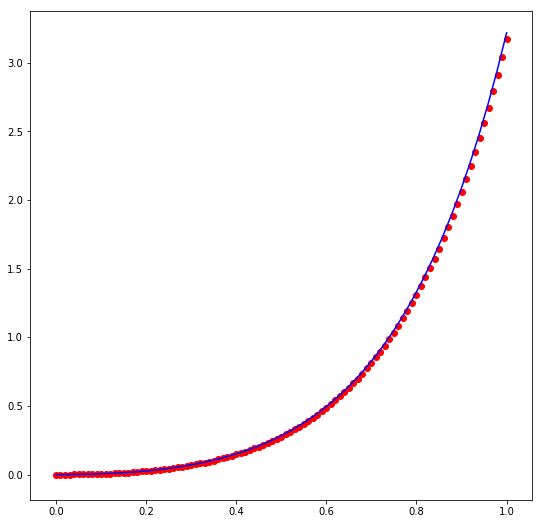

In [20]:
xvalues = []
yvalues = []

h = (b-a)/n #primero determinamos el tamaño de paso
t1 = a
w = y0
xvalues.append(t1)
yvalues.append(w)

for i in range(1, n+1):
    w = w + h*f.subs({x:t1, y:w})
    t1 = a + i*h
    xvalues.append(t1)
    yvalues.append(w)
    
lambdaf = lambdify(x, sol);
xv = np.linspace(a , b  , 50)
ax.plot(xv, lambdaf(xv), color='blue')
plt.scatter(xvalues, yvalues, color='red');
plt.show()